# Simulación Sección Cruzada de Absorción para el CO2 (ISA y Hitran)

<p style='text-align: justify;'>Este código de programación permite obtener la sección cruzada de absorción (XS) para la molécula del dióxido de carbono (CO2) a partir del modelo matemático de la atmósfera terrestre en la que los valores de Presión (P) y Temperatura (T) varían dependiendo de la altura (h). Además, se utilizan la funciones brindadas por Hitran en el módulo hapi.py utilizando el perfil Voigt para la obtención de los datos requeridos. Como resultado final, se tiene como salida un conjunto de archivos .txt con un nombre identificativo XSCO2Voigt_h_T_P.txt.  

Cabe resaltar que el rango en el que se encuentran los datos va desde 4989.773421cm-1 a 4990.163421cm-1, esto con el fin de simular solo en la banda de interés que en longitud de onda corresponde a los 2004nm. </p>

Referencias:

[https://hitran.org/hapi/]

[https://es.linkfang.org/wiki/Atmósfera_Estándar_Internacional]

In [1]:
#Importar librerías 
import numpy as np
import pylab as plt
from pylab import show,plot,subplot,xlim,ylim,title,legend,xlabel,ylabel,figure
from hapi import *

HAPI version: 1.1.2.0
To get the most up-to-date version please check http://hitran.org/hapi
ATTENTION: Python versions of partition sums from TIPS-2017 are now available in HAPI code

           It is free to use HAPI. If you use HAPI in your research or software development,
           please cite it using the following reference:
           R.V. Kochanov, I.E. Gordon, L.S. Rothman, P. Wcislo, C. Hill, J.S. Wilzewski,
           HITRAN Application Programming Interface (HAPI): A comprehensive approach
           to working with spectroscopic data, J. Quant. Spectrosc. Radiat. Transfer 177, 15-30 (2016)
           DOI: 10.1016/j.jqsrt.2016.03.005


In [2]:
#Establece la conexión a la base de datos y será guardada
#en una carpeta local llamada "data"
db_begin('data')

Using data

CO2
                     Lines parsed: 43


In [3]:
#Descarga la data desde el servidor HITRANonline y la guarda en una tabla local
fetch('CO2',2,1,4989.4, 4991)


Data is fetched from http://hitran.org

BEGIN DOWNLOAD: CO2
  65536 bytes written to data/CO2.data
Header written to data/CO2.header
END DOWNLOAD
                     Lines parsed: 43
PROCESSED


In [4]:
"Variables"
#Definicion de variables base (1atm-950m-23°C) para el calculo de T(h) y P(h)
T0 = 296;         #Temperatura Base [°K]
P0 = 101325;      #Presión Base [Pa]
H0 = 1000;        #Altura inicial [m]
Gt = -6.5/1000;   #Gradiente Termico Base [°K/m]
R = 287;          #Constante individual del aire [m^2/s^2*°K^2]

In [5]:
h1 = np.arange(1000,12000,1000)  #Troposfera - Tropopausa
h2 = np.arange(12000,21000,1000) #Tropopausa - Estratosfera
h3 = np.arange(21000,33000,1000) #Estrafosfera - Estratosfera
h4 = np.arange(33000,48000,1000) #Estratosfera - Estratopausa
h5 = np.arange(48000,52000,1000) #Estratopausa - Mesosfera

{'self': 1.0}
{'self': 1.0}
{'self': 1.0}
{'self': 1.0}
{'self': 1.0}
{'self': 1.0}
{'self': 1.0}
{'self': 1.0}
{'self': 1.0}
{'self': 1.0}
{'self': 1.0}


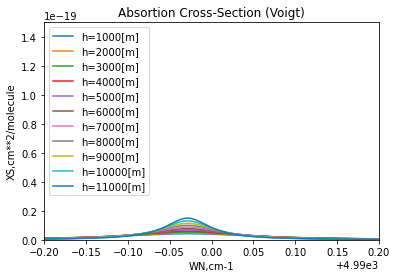

In [6]:
"Sección Cruzada de Absorción - Voigt" 
for it in h1: #Troposfera - Tropopausa
    altura_str = str(it)
    T = T0 + Gt*(it-H0)                             #T[°K]
    P = P0*((T/T0)**(-9.8/(Gt*R)))*0.009869*0.001   #P[atm]
    Tact = T;
    Pact = P;
    nuV,coefV=absorptionCoefficient_Voigt(Components=((2,1),),
            SourceTables='CO2',WavenumberStep=0.0001, HITRAN_units=True,
            GammaL='gamma_self', Environment={'p':P,'T':T},
            File=('XSCO2Voigt'+'_'+altura_str+'_'+str(round(T,3))+'_'
                  +str(round(P,3))+'.txt'))
    "Grafica Cross Section - Voigt"
    plt.plot(nuV,coefV,label='h='+altura_str+'[m]')
    #plt.plot(nuV,coefV,'y',label='h='+altura_str+'[m], T='+
              #str(round(T,3))+'[K] \nP='+str(round(P,3))+'[atm]')
    plt.xlim(4989.8, 4990.2)
    plt.ylim(0,1.5e-19)
    plt.xlabel('WN,cm-1')
    plt.ylabel('XS,cm**2/molecule')
    plt.title('Absortion Cross-Section (Voigt)')
    plt.legend(loc='upper left')
plt.show()  

{'self': 1.0}
{'self': 1.0}
{'self': 1.0}
{'self': 1.0}
{'self': 1.0}
{'self': 1.0}
{'self': 1.0}
{'self': 1.0}
{'self': 1.0}


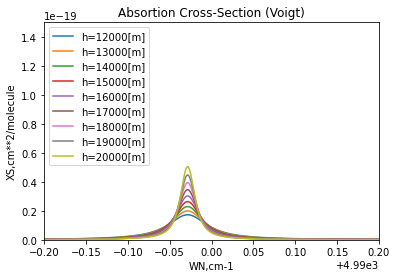

In [7]:
for it in h2: #Tropopausa - Estratosfera   
     altura_str = str(it)
     H0 = 11000
     T = Tact                                             #T[°K]
     P = Pact*(exp((-9.8/(R*T))*(it-H0)))                 #P[atm]
     Pact2 = P
     nuV,coefV =absorptionCoefficient_Voigt(Components=((2,1),),
            SourceTables='CO2',WavenumberStep=0.0001, HITRAN_units=True,
            GammaL='gamma_self', Environment={'p':P,'T':T},
            File=('XSCO2Voigt'+'_'+altura_str+'_'+str(round(T,3))+'_'
                  +str(round(P,3))+'.txt'))
     "Grafica Cross Section - Voigt"
     plt.plot(nuV,coefV,label='h='+altura_str+'[m]')
     #plt.plot(nuV,coefV,'b',label='h='+altura_str+'[m], T='+
              #str(round(T,3))+'[K] \nP='+str(round(P,3))+'[atm]')
     plt.xlim(4989.8, 4990.2)
     plt.ylim(0,1.5e-19)
     plt.xlabel('WN,cm-1')
     plt.ylabel('XS,cm**2/molecule')
     plt.title('Absortion Cross-Section (Voigt)')
     plt.legend(loc='upper left')
plt.show()

{'self': 1.0}
{'self': 1.0}
{'self': 1.0}
{'self': 1.0}
{'self': 1.0}
{'self': 1.0}
{'self': 1.0}
{'self': 1.0}
{'self': 1.0}
{'self': 1.0}
{'self': 1.0}
{'self': 1.0}


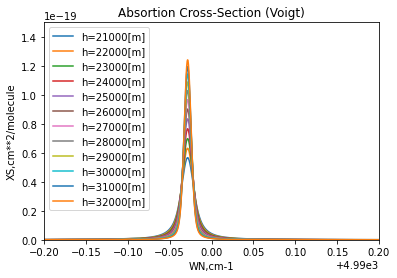

In [8]:
for it in h3: #Estrafosfera - Estratosfera
    altura_str = str(it)
    H0 = 20000
    Gt = 1/1000
    T = Tact + Gt*(it-H0)                               #T[°K]
    P = Pact2*((T/Tact)**(-9.8/(Gt*R)))                 #P[atm]
    Tact2 = T
    Pact3 = P
    nuV,coefV =absorptionCoefficient_Voigt(Components=((2,1),),
            SourceTables='CO2',WavenumberStep=0.0001, HITRAN_units=True,
            GammaL='gamma_self', Environment={'p':P,'T':T},
            File=('XSCO2Voigt'+'_'+altura_str+'_'+str(round(T,3))+'_'
                  +str(round(P,3))+'.txt'))
    "Grafica Cross Section - Voigt"
    plt.plot(nuV,coefV,label='h='+altura_str+'[m]')
    #plt.plot(nuV,coefV,'r',label='h='+altura_str+'[m], T='+
              #str(round(T,3))+'[K] \nP='+str(round(P,3))+'[atm]')
    plt.xlim(4989.8, 4990.2)
    plt.ylim(0,1.5e-19)
    plt.xlabel('WN,cm-1')
    plt.ylabel('XS,cm**2/molecule')
    plt.title('Absortion Cross-Section (Voigt)')
    plt.legend(loc='upper left')
plt.show()

{'self': 1.0}
{'self': 1.0}
{'self': 1.0}
{'self': 1.0}
{'self': 1.0}
{'self': 1.0}
{'self': 1.0}
{'self': 1.0}
{'self': 1.0}
{'self': 1.0}
{'self': 1.0}
{'self': 1.0}
{'self': 1.0}
{'self': 1.0}
{'self': 1.0}


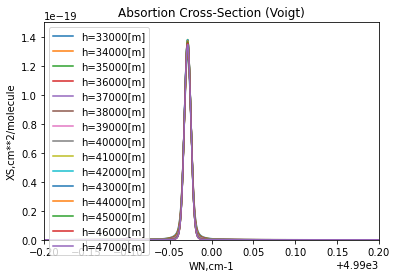

In [9]:
for it in h4: #Estratosfera - Estratopausa
    altura_str = str(it)
    H0 = 32000
    Gt = 2.8/1000
    T = Tact2 + Gt*(it-H0)                                #T[°K]
    P = Pact3*((T/Tact2)**(-9.8/(Gt*R)))                  #P[atm]
    Tact3 = T
    Pact4 = P
    nuV,coefV =absorptionCoefficient_Voigt(Components=((2,1),),
            SourceTables='CO2',WavenumberStep=0.0001, HITRAN_units=True,
            GammaL='gamma_self', Environment={'p':P,'T':T},
            File=('XSCO2Voigt'+'_'+altura_str+'_'+str(round(T,3))+'_'
                  +str(round(P,3))+'.txt'))
    "Grafica Cross Section - Voigt"
    plt.plot(nuV,coefV,label='h='+altura_str+'[m]')
    #plt.plot(nuV,coefV,'g',label='h='+altura_str+'[m], T='+
              #str(round(T,3))+'[K] \nP='+str(round(P,3))+'[atm]')
    plt.xlim(4989.8, 4990.2)
    plt.ylim(0,1.5e-19)
    plt.xlabel('WN,cm-1')
    plt.ylabel('XS,cm**2/molecule')
    plt.title('Absortion Cross-Section (Voigt)')
    plt.legend(loc='upper left')
plt.show()

{'self': 1.0}
{'self': 1.0}
{'self': 1.0}
{'self': 1.0}


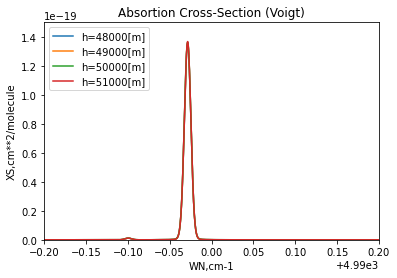

In [10]:
for it in h5: #Estratopausa - Mesosfera
    altura_str = str(it)
    H0 = 47000
    T = Tact3                                             #T[°K]
    P = Pact4*(exp((-9.8/(R*T))*(it-H0)))                 #P[atm]
    nuV,coefV =absorptionCoefficient_Voigt(Components=((2,1),),
            SourceTables='CO2',WavenumberStep=0.0001, HITRAN_units=True,
            GammaL='gamma_self', Environment={'p':P,'T':T},
            File=('XSCO2Voigt'+'_'+altura_str+'_'+str(round(T,3))+'_'
                  +str(round(P,3))+'.txt'))
    "Grafica Cross Section - Voigt"
    plt.plot(nuV,coefV,label='h='+altura_str+'[m]')
    #plt.plot(nuV,coefV,'m',label='h='+altura_str+'[m], T='+
              #str(round(T,3))+'[K] \nP='+str(round(P,3))+'[atm]')
    plt.xlim(4989.8, 4990.2)
    plt.ylim(0,1.5e-19)
    plt.xlabel('WN,cm-1')
    plt.ylabel('XS,cm**2/molecule')
    plt.title('Absortion Cross-Section (Voigt)')
    plt.legend(loc='upper left')
plt.show()